In [2]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore")

In [35]:
data=pd.read_csv('Immo_J2.csv')

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-119.84,36.77,4.420453,17.033235,18.105102,12.929104,0.414959,48.481280,0,1,0,0
1,-117.80,33.68,6.041089,17.433687,15.795198,12.143815,2.543175,66.563285,1,0,0,0
2,-120.19,36.60,18.663068,14.027868,16.147093,10.492193,0.468026,46.080742,0,1,0,0
3,-118.32,34.10,22.846436,12.799088,14.197427,10.693054,0.449634,61.810613,1,0,0,0
4,-121.23,37.79,15.814330,17.191146,17.059582,12.485345,1.712936,54.543376,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14851,-121.90,39.59,15.093316,16.044728,15.144972,11.027624,1.308037,51.650859,0,1,0,0
14852,-122.25,38.11,34.930654,18.108507,17.063840,13.302257,1.097618,52.829072,0,0,1,0
14853,-121.22,38.92,14.368385,18.416639,17.375172,13.041151,1.856483,61.263789,0,1,0,0
14854,-118.14,34.16,28.291254,18.842905,21.346840,15.537344,1.078490,58.066500,1,0,0,0


In [36]:
X=data.drop(['median_house_value','longitude','latitude','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'],axis=1)
y=data['median_house_value']

<AxesSubplot:>

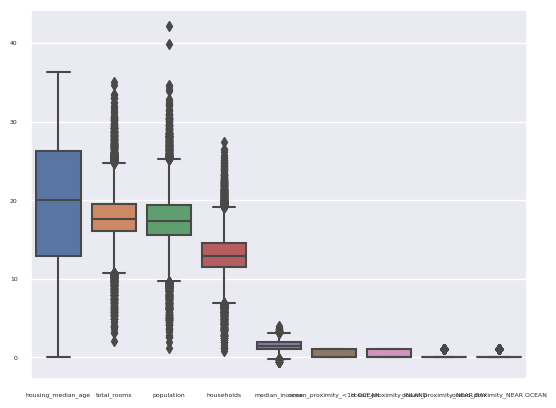

In [20]:
sns.set(font_scale=0.4)
sns.boxplot(data=X)

In [37]:
from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X)

<AxesSubplot:>

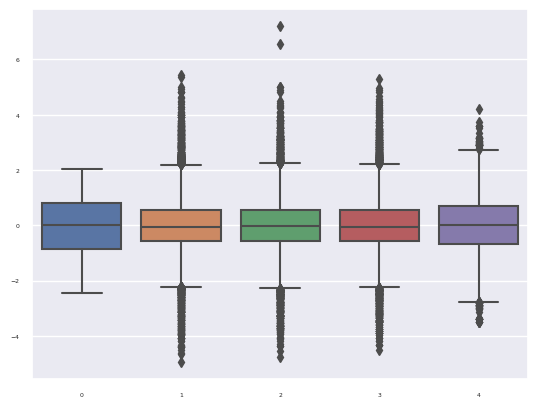

In [38]:
sns.boxplot(data=X_scaled)

In [39]:
ols = sm.OLS(y, sm.add_constant(X_scaled)).fit()

In [40]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3555.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:29:27   Log-Likelihood:                -44819.
No. Observations:               14856   AIC:                         8.965e+04
Df Residuals:                   14850   BIC:                         8.970e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5715      0.041   1468.630      0.000      59.492      59.651
x1             1.0125      0.044     22.931      0.000       0.926       1.099
x2            -4.5493      0.138    -32.860      0.000      -4.821      -4.278
x3            -3.7561      0.110    -34.219      0.000      -3.971      -3.541
x4             8.6240      0.168     51.474      0.000       8.296       8.952
x5             5.8853      0.049    119.840      0.000       5.789       5.982
==============================================================================
Omnibus:                      692.747   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1376.619
Skew:                           0.340   Prob(JB):                    1.18e-299
Kurtosis:                       4.327   Cond. No.                         9.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""